**Многослойный перцептрон** с нуля

In [ ]:
import numpy as np

Можно сказать, что **нейросеть** - это функция, которая картирует входные данные на выходные

**Нейрон** - это абстракция, математическая модель, которая принимать входные данные, выполнять вычисления и передавает сигнал на выход

**Обратное распространение ошибки (backpropagation)** - это алгоритм обучения нейронных сетей, который позволяет корректировать веса связей между нейронами, чтобы минимизировать ошибку модели

Основные этапы обратного распространения ошибки:

* прямой проход (forward pass)
* вычисление ошибки (loss calculation)
* обратный проход (backward pass)
* обновление весов (weight update)

In [ ]:
# Функции актиавации и их производные
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

В этом примере мы задали функции активации `Sigmoid` и `ReLU`, а также их производные, которые понадобятся нам для расчета обратного прохода

**Функция активации** применяется к выходу каждого нейрона в сети

Что делает функция активации:

- делает связь между входами и выходами нелинейной
- ограничивает выходные значения, предотвращает их чрезмерное увеличение или уменьшение

Функция `ReLU` обнуляет отрицательные значения, а `Sigmoid` помещает значения в диапазон `[0,1]`

Ограничение выходных значений обеспечивает стабильную работу нейронной сети и повышает точность ее предсказаний

Например, если значения на выходе нейронов слишком большие, это может привести к ситуации, когда модель становится менее чувствительной к изменениям входных данных

Например, если модель получит на вход изображение необычной кошки, точность предсказаний нашего классификатора значительно снизится

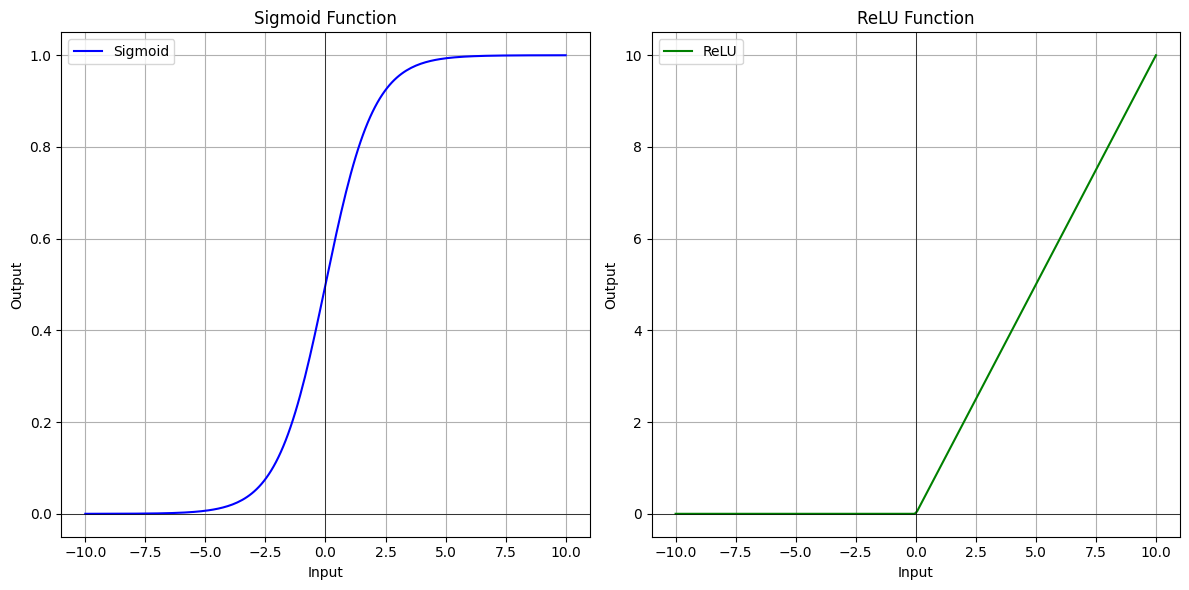

In [ ]:
# Генерация случайных входных данных для визуализации
x = np.linspace(-10, 10, 200)

# Вычисление функций активации
sigmoid_values = sigmoid(x)
relu_values = relu(x)

# Отрисовка графиков функций
plt.figure(figsize=(12, 6))

# Sigmoid
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_values, label="Sigmoid", color="blue")
plt.title("Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()

# ReLU
plt.subplot(1, 2, 2)
plt.plot(x, relu_values, label="ReLU", color="green")
plt.title("ReLU Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()

# Отобразить графики
plt.tight_layout()
plt.show()

In [ ]:
# Средняя квадратичная ошибка и производная
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

На этапе **вычисления ошибки** определяется, насколько предсказание модели отличается от истинного значения из обучающей выборки. Для этого используется функция потерь

---

**Веса** (weights) и **смещения** (biases) — это ключевые параметры, которые управляют поведением и обучением нейронной сети. Они настраиваются во время обучения с целью минимизации ошибки модели

**Вес** — это числовой коэффициент, который определяет важность входного сигнала для нейрона. Чем больше вес, тем большее влияние оказывает соответствующий вход на итоговый результат. Во время обучения веса настраиваются так, чтобы минимизировать ошибку предсказаний. Этот процесс называется обратным распространением ошибки

**Смещение** — это дополнительное число, которое добавляется к значениям входов и весов. Использование смещений позволяет модели подстраиваться под данные, находить закономерности в данных

In [ ]:
# Многослойный перцептрон
class MLP:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        # Инициализация весов и смещений
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))
        self.lr = lr  # Скорость обучения (learning rate)

    def forward(self, X):
        """
        На этапе прямого прохода (forward pass) данные проходят через
        нейронную сеть от входного слоя к выходному. Для каждого нейрона
        вычисляется результат его активации. На выходе сети получается
        предсказание модели
        """
        # Проход от входного слоя к скрытому
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)

        # Проход от скрытого слоя к выходному
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)

        return self.output

    def backward(self, X, y_true, y_pred):
        """
        На этапе обратного прохода (backward pass) ошибка распространяется
        назад через слои сети. Для каждого веса вычисляется его вклад в ошибку
        сети. Вычисляется производная функции ошибки по этому весу
        """
        # Вычисление градиента выходного слоя
        output_error = mse_loss_derivative(y_true, y_pred) * sigmoid_derivative(self.output_input)
        grad_weights_hidden_output = np.dot(self.hidden_output.T, output_error)
        grad_bias_output = np.sum(output_error, axis=0, keepdims=True)

        # Вычисления градиента скрытых слоев
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * relu_derivative(self.hidden_input)
        grad_weights_input_hidden = np.dot(X.T, hidden_error)
        grad_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True)

        # Обновление значений весов и смещений
        self.weights_hidden_output -= self.lr * grad_weights_hidden_output
        self.bias_output -= self.lr * grad_bias_output
        self.weights_input_hidden -= self.lr * grad_weights_input_hidden
        self.bias_hidden -= self.lr * grad_bias_hidden

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Этап прямого прохода
            y_pred = self.forward(X)

            # Вычисление ошибки
            loss = mse_loss(y, y_pred)

            # Этап обратного прохода
            self.backward(X, y, y_pred)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

**Градиентный спуск** (gradient descent) — это алгоритм оптимизации, который используется для минимизации функции потерь (ошибки) нейронной сети. Он обновляет параметры модели (например, веса и смещения), чтобы сеть приближалась к оптимальному решению

Градиентный спуск вычисляет текущую ошибку (значение функции потерь), затем ищет направление, в котором ошибка уменьшается быстрее всего. Это направление называется **градиентом** функции потерь. Далее алгоритм обновляет параметры модели (веса и смещения), делая шаг в направлении уменьшения ошибки

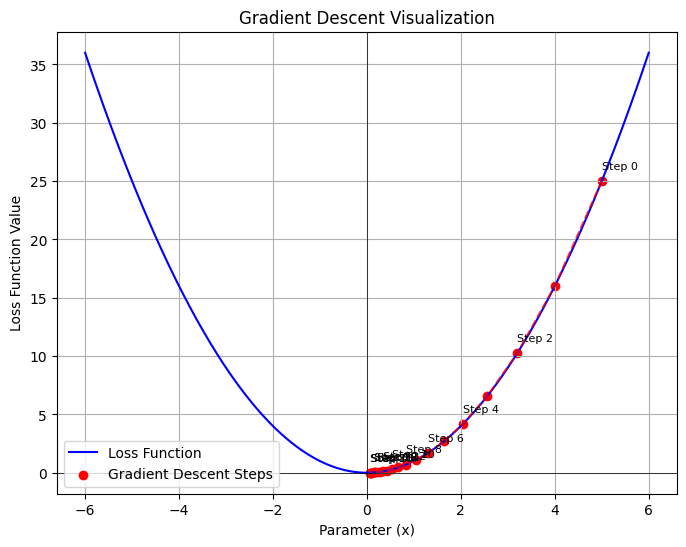

In [ ]:
# Иллюстрация градиентного спуска

# Квадратичная функция потерь и ее производная для расчета градиента
def loss_function(x):
    return x**2

def gradient(x):
    return 2 * x

# Инициализация параметров для демонстрации работы градиента
x_start = 5  # Стартовая точка
learning_rate = 0.1 # Скорость движения градиента
iterations = 20 # Количество итераций

# Хранилище точек движения градиента
x_values = [x_start]
y_values = [loss_function(x_start)]

# Градиентный спуск
x = x_start
for _ in range(iterations):
    grad = gradient(x)
    x = x - learning_rate * grad
    x_values.append(x)
    y_values.append(loss_function(x))

# Отрисовка функции потерь и шагов градиентного спуска
x_range = np.linspace(-6, 6, 400)
y_range = loss_function(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, label="Loss Function", color="blue")
plt.scatter(x_values, y_values, color="red", label="Gradient Descent Steps")
plt.plot(x_values, y_values, color="red", linestyle="--", alpha=0.7)

# Подписи к графику
for i, (x, y) in enumerate(zip(x_values, y_values)):
    if i % 2 == 0:  # Подписи создаются на каждом шаге
        plt.text(x, y + 1, f"Step {i}", fontsize=8)

plt.title("Gradient Descent Visualization")
plt.xlabel("Parameter (x)")
plt.ylabel("Loss Function Value")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

В этом примере мы создали визуалиацию для **градиентного спуска** на простой квадратичной функции потерь  `f(x) = x^2`

- **Синяя кривая**: функция потерь отражает связи между параметром x и значением потерь
- **Красные точки**: шаги градиента, начиная со значения x = 5
- **Пунктивные красные точки**: путь градиентного спуска, итеративная минимизация потерь

In [ ]:
# Пример процесса обучения
if __name__ == "__main__":
    # Задача XOR
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Инициализация MLP
    mlp = MLP(input_size=2, hidden_size=4, output_size=1, lr=0.1)

    # Обучение MLP
    mlp.train(X, y, epochs=1000)

    # Вывод предсказаний
    predictions = mlp.forward(X)
    print("Predictions:")
    print(predictions)

Epoch 0, Loss: 0.24999853313394269
Epoch 100, Loss: 0.24999105013278886
Epoch 200, Loss: 0.24997666688278422
Epoch 300, Loss: 0.24994093789579622
Epoch 400, Loss: 0.24984856430770905
Epoch 500, Loss: 0.2496310873414996
Epoch 600, Loss: 0.24914826058731188
Epoch 700, Loss: 0.24804438327917627
Epoch 800, Loss: 0.2455439994935179
Epoch 900, Loss: 0.24009461978872026
Predictions:
[[0.49035844]
 [0.49027897]
 [0.56421504]
 [0.47533177]]


Задача **XOR (Exclusive OR)**:

- бинарная классификация
- 2 входные переменные x_1 и x_2
- функция XOR выводит 1, если входные переменные различны
- функция XOR выводит 0, если входные переменные совпадают

Truth Table

| x_1      | x_2      | Output (XOR) |
|----------|----------|---------------|
| 0        | 0        | 0             |
| 0        | 1        | 1             |
| 1        | 0        | 1             |
| 1        | 1        | 0             |

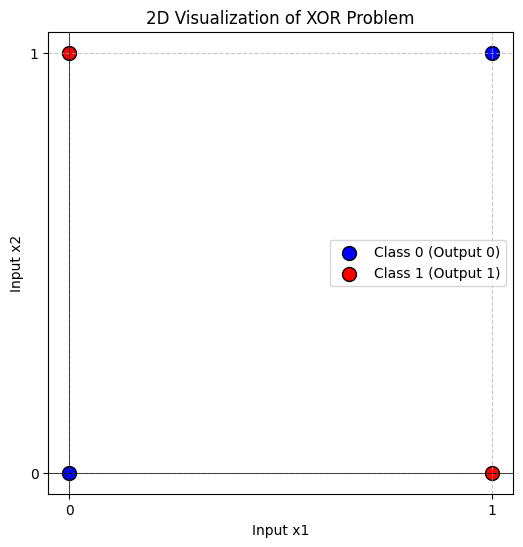

In [ ]:
import matplotlib.pyplot as plt

# Визуализация задачи XOR
points = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels = [0, 1, 1, 0]

# Делим на классы
class_0 = [point for point, label in zip(points, labels) if label == 0]
class_1 = [point for point, label in zip(points, labels) if label == 1]

# Конвертация список в классы
x0, y0 = zip(*class_0)
x1, y1 = zip(*class_1)

# Отрисовка
plt.figure(figsize=(6, 6))
plt.scatter(x0, y0, color="blue", label="Class 0 (Output 0)", s=100, edgecolor="k")
plt.scatter(x1, y1, color="red", label="Class 1 (Output 1)", s=100, edgecolor="k")

# Аннотация графика
plt.title("2D Visualization of XOR Problem")
plt.xlabel("Input x1")
plt.ylabel("Input x2")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True, linestyle="--", alpha=0.7)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.show()

Визуализация:

- пары данных (0, 0) и (1, 1) относятся к общему классу 0
- пары данных (0, 1) и (1, 0) относятся к общему класу 1

Визуализация показывает, что эти классы невозможно разделить линейно